### Preprocesing

In [1]:
# import libraries
import pandas as pd
import numpy as np

# import libraries for plot
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv('pokemon.csv')

In [84]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
# change the Legedary
def data_to_number(x):
    if x == "True":
        return 1
    else:
        return 0

df['Legendary'] = df["Legendary"].map(data_to_number)

In [7]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


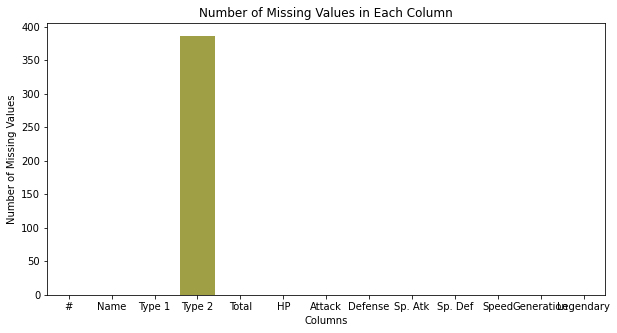

In [8]:
# check for missing values
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of missing values in each column
missing = df.isnull().sum()

# Plot the number of missing values in each column
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values)

# Add labels and title to the plot
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values in Each Column")

# Show the plot
plt.show()

In [9]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,0
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,0


### Classical Methods

__Undersampling__

is the most straightforward technique to balance an unbalanced data set. The idea is to reduce the number of samples in the majority class to the number equal to the number of samples in the minority class. Usually, it is done by randomly selecting m samples from the majority class, where m is the number of samples in the minority class.

In [11]:
!pip install imblearn

  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [13]:
from imblearn.under_sampling import RandomUnderSampler

# Convert all values in the Type 2 column to string data type
df["Type 2"] = df["Type 2"].astype(str)

# Separate the feature we want to undersample
X = df.drop(["Type 2"], axis=1)
y = df["Type 2"]

# Undersample the minority class (Type 2) using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Combine the resampled feature with the rest of the dataset
resampled_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=["Type 2"])], axis=1)

# Check the distribution of the Type 2 feature after undersampling
print(resampled_df["Type 2"].value_counts())

Bug         3
Ground      3
Water       3
Steel       3
Rock        3
Psychic     3
Poison      3
Normal      3
Ice         3
Grass       3
Dark        3
Ghost       3
Flying      3
Fire        3
Fighting    3
Fairy       3
Electric    3
Dragon      3
nan         3
Name: Type 2, dtype: int64


In [14]:
resampled_df

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 2
0,347,Anorith,Rock,355,45,95,50,40,50,75,3,0,Bug
1,348,Armaldo,Rock,495,75,125,100,70,80,45,3,0,Bug
2,451,Skorupi,Poison,330,40,50,90,30,55,65,4,0,Bug
3,130,GyaradosMega Gyarados,Water,640,95,155,109,70,130,81,1,0,Dark
4,658,Greninja,Water,530,72,95,67,103,71,122,6,0,Dark
5,552,Krokorok,Ground,351,60,82,45,45,45,74,5,0,Dark
6,715,Noivern,Flying,535,85,70,80,97,80,123,6,0,Dragon
7,691,Dragalge,Poison,494,65,75,90,97,123,44,6,0,Dragon
8,329,Vibrava,Ground,340,50,70,50,50,50,70,3,0,Dragon
9,644,Zekrom,Dragon,680,100,150,120,120,100,90,5,0,Electric


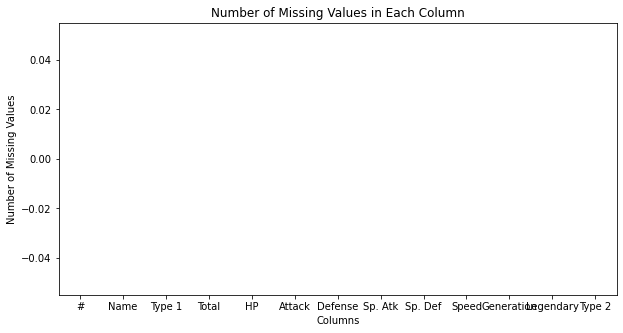

In [15]:
# check for missing values
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of missing values in each column
missing = resampled_df.isnull().sum()

# Plot the number of missing values in each column
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values)

# Add labels and title to the plot
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values in Each Column")

# Show the plot
plt.show()

### Modify data for next steps

In [258]:
df = pd.read_csv('pokemon.csv')

In [259]:
df = df[['Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']]

In [260]:
df

,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Poison,318,45,49,49,65,65,45,1,False
1,Poison,405,60,62,63,80,80,60,1,False
2,Poison,525,80,82,83,100,100,80,1,False
3,Poison,625,80,100,123,122,120,80,1,False
4,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...
795,Fairy,600,50,100,150,100,150,50,6,True
796,Fairy,700,50,160,110,160,110,110,6,True
797,Ghost,600,80,110,60,150,130,70,6,True
798,Dark,680,80,160,60,170,130,80,6,True


In [261]:
# change the Legendary
def data_to_number(x):
    if x == "True":
        return 1
    else:
        return 0

df['Legendary'] = df["Legendary"].map(data_to_number)

In [262]:
df.head()

,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Poison,318,45,49,49,65,65,45,1,0
1,Poison,405,60,62,63,80,80,60,1,0
2,Poison,525,80,82,83,100,100,80,1,0
3,Poison,625,80,100,123,122,120,80,1,0
4,NaN,309,39,52,43,60,50,65,1,0


In [263]:
# Get unique Type 2 values
unique_types = df['Type 2'].dropna().unique()

# Create a dictionary mapping each type to an integer
type_to_int = {type_: i for i, type_ in enumerate(unique_types)}

# Apply the mapping using map
df['Type 2'] = df['Type 2'].map(type_to_int)

# Display the first few rows to check the conversion
print(df.head())


   Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
0     0.0    318  45      49       49       65       65     45           1   
1     0.0    405  60      62       63       80       80     60           1   
2     0.0    525  80      82       83      100      100     80           1   
3     0.0    625  80     100      123      122      120     80           1   
4     NaN    309  39      52       43       60       50     65           1   

   Legendary  
0          0  
1          0  
2          0  
3          0  
4          0  


In [264]:
df_class_weights['Type 2'].info()

<class 'pandas.core.series.Series'>
Int64Index: 414 entries, 0 to 799
Series name: Type 2
Non-Null Count  Dtype  
--------------  -----  
414 non-null    float64
dtypes: float64(1)
memory usage: 6.5 KB


In [265]:
df

,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0.0,318,45,49,49,65,65,45,1,0
1,0.0,405,60,62,63,80,80,60,1,0
2,0.0,525,80,82,83,100,100,80,1,0
3,0.0,625,80,100,123,122,120,80,1,0
4,NaN,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
795,4.0,600,50,100,150,100,150,50,6,0
796,4.0,700,50,160,110,160,110,110,6,0
797,15.0,600,80,110,60,150,130,70,6,0
798,11.0,680,80,160,60,170,130,80,6,0


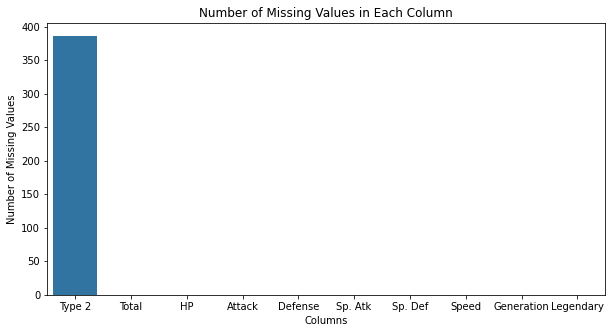

In [266]:
# check for missing values
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of missing values in each column
missing = df.isnull().sum()

# Plot the number of missing values in each column
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values)

# Add labels and title to the plot
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values in Each Column")

# Show the plot
plt.show()

In [267]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with strategy 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the 'Type 2' column and store the result in a new column 'Type 2 Imputed'
df['Type 2 Imputed'] = imputer.fit_transform(df['Type 2'].values.reshape(-1, 1))

# Display the first few rows to check the filled values
print(df.head())


   Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
0     0.0    318  45      49       49       65       65     45           1   
1     0.0    405  60      62       63       80       80     60           1   
2     0.0    525  80      82       83      100      100     80           1   
3     0.0    625  80     100      123      122      120     80           1   
4     NaN    309  39      52       43       60       50     65           1   

   Legendary  Type 2 Imputed  
0          0             0.0  
1          0             0.0  
2          0             0.0  
3          0             0.0  
4          0             1.0  


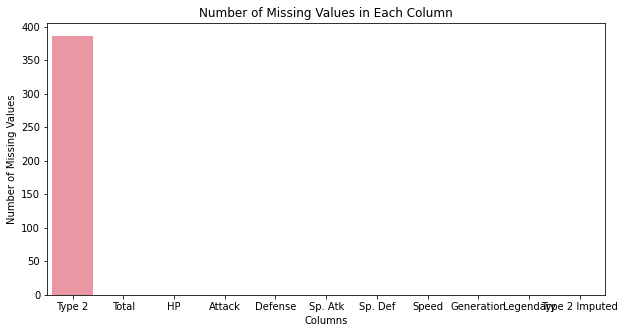

In [248]:
# check for missing values
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of missing values in each column
missing = df.isnull().sum()

# Plot the number of missing values in each column
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values)

# Add labels and title to the plot
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values in Each Column")

# Show the plot
plt.show()

In [268]:
# Drop the 'Class Weight' column
df = df.drop('Type 2 Imputed', axis=1)

__Class Weights__

In the examples above with the confusion matrix, we saw that sometimes for a model, it is more convenient to classify all samples as majority class samples. A way to escape this situation is to penalize harder errors by misclassifying minority class samples. In the base case, every error during classification is equal to 1.

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type 2      414 non-null    float64
 1   Total       800 non-null    int64  
 2   HP          800 non-null    int64  
 3   Attack      800 non-null    int64  
 4   Defense     800 non-null    int64  
 5   Sp. Atk     800 non-null    int64  
 6   Sp. Def     800 non-null    int64  
 7   Speed       800 non-null    int64  
 8   Generation  800 non-null    int64  
 9   Legendary   800 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 62.6 KB


In [172]:
df_class_weight = df

In [254]:
df

,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0.0,318,45,49,49,65,65,45,1,0
1,0.0,405,60,62,63,80,80,60,1,0
2,0.0,525,80,82,83,100,100,80,1,0
3,0.0,625,80,100,123,122,120,80,1,0
4,NaN,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
795,4.0,600,50,100,150,100,150,50,6,0
796,4.0,700,50,160,110,160,110,110,6,0
797,15.0,600,80,110,60,150,130,70,6,0
798,11.0,680,80,160,60,170,130,80,6,0


In [251]:
# Calculate the number of samples for each class
class_counts = df_class_weight['Type 2'].value_counts()

# Calculate the total number of samples
total_samples = len(df_class_weight)

# Calculate class weights
class_weights = total_samples / (len(class_counts) * class_counts)

# Create a dictionary with class weights
class_weights_dict = class_weights.to_dict()

# Assign class weights to the samples in the dataset
df_class_weight['Type 2'] = df_class_weight['Type 2'].map(class_weights_dict)


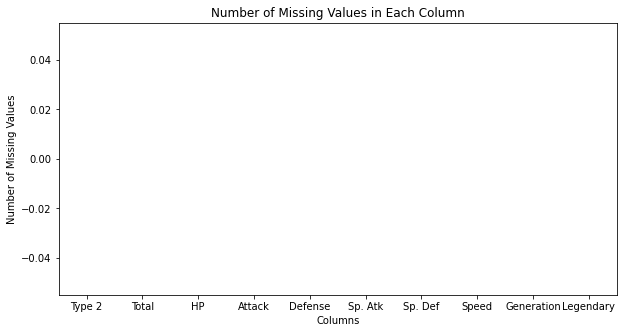

In [252]:
# check for missing values
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of missing values in each column
missing = df_class_weight.isnull().sum()

# Plot the number of missing values in each column
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values)

# Add labels and title to the plot
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values in Each Column")

# Show the plot
plt.show()

După cum putem observa Class Weight nu prea tare s-a făcue efectul, dacă nu greșesc motiv-ul anume este că există Nan values...?

### Oversampling

Oversampling is a technique that works backward to undersampling. Instead of reducing the size of the majority class, we are generating new samples for the minority class using different algorithms. The biggest family of such algorithms is SMOTE. There are also other algorithms that make this process in different ways.

__SMOTE__

(Synthetic Minority Oversampling Technique) is the simplest and the most popular oversampling algorithm

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type 2          414 non-null    float64
 1   Total           800 non-null    int64  
 2   HP              800 non-null    int64  
 3   Attack          800 non-null    int64  
 4   Defense         800 non-null    int64  
 5   Sp. Atk         800 non-null    int64  
 6   Sp. Def         800 non-null    int64  
 7   Speed           800 non-null    int64  
 8   Generation      800 non-null    int64  
 9   Legendary       800 non-null    int64  
 10  Type 2 Imputed  800 non-null    float64
dtypes: float64(2), int64(9)
memory usage: 68.9 KB


In [226]:
df = pd.read_csv('pokemon.csv')

df = df[['Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']]

In [227]:
df

,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Poison,318,45,49,49,65,65,45,1,False
1,Poison,405,60,62,63,80,80,60,1,False
2,Poison,525,80,82,83,100,100,80,1,False
3,Poison,625,80,100,123,122,120,80,1,False
4,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...
795,Fairy,600,50,100,150,100,150,50,6,True
796,Fairy,700,50,160,110,160,110,110,6,True
797,Ghost,600,80,110,60,150,130,70,6,True
798,Dark,680,80,160,60,170,130,80,6,True


In [228]:
# change the Legendary
def data_to_number(x):
    if x == "True":
        return 1
    else:
        return 0

df['Legendary'] = df["Legendary"].map(data_to_number)


# Get unique Type 2 values
unique_types = df['Type 2'].dropna().unique()

# Create a dictionary mapping each type to an integer
type_to_int = {type_: i for i, type_ in enumerate(unique_types)}

# Apply the mapping using map
df['Type 2'] = df['Type 2'].map(type_to_int)

# Display the first few rows to check the conversion
print(df.head())


   Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
0     0.0    318  45      49       49       65       65     45           1   
1     0.0    405  60      62       63       80       80     60           1   
2     0.0    525  80      82       83      100      100     80           1   
3     0.0    625  80     100      123      122      120     80           1   
4     NaN    309  39      52       43       60       50     65           1   

   Legendary  
0          0  
1          0  
2          0  
3          0  
4          0  


In [314]:
df.head()

,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0.0,318,45,49,49,65,65,45,1,0
1,0.0,405,60,62,63,80,80,60,1,0
2,0.0,525,80,82,83,100,100,80,1,0
3,0.0,625,80,100,123,122,120,80,1,0
4,1.0,309,39,52,43,60,50,65,1,0


In [329]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df'

# Drop the 'Type 2' column
# df = df.drop('Type 2', axis=1)

# Define the features (X) and target variable (y)
X = df.drop('Type 2', axis=1)
y = df['Type 2']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the minimum number of samples in any class
n_samples = df['Type 2'].value_counts().min() - 1

# Create a SMOTE instance with the custom n_neighbors value
# smote = SMOTE(random_state=42, n_neighbors = min_samples)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

# Create a SMOTE instance with the custom k_neighbors value
smote = SMOTE(random_state=42, k_neighbors=n_samples)

# Apply SMOTE to the training dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the balanced training data
model.fit(X_train, y_train)

# Test the model on the testing data
score = model.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.6041666666666666


In [ ]:
# aici este o eroare, ca să fie rezulatul este nevoie de dat run de mai multe ori

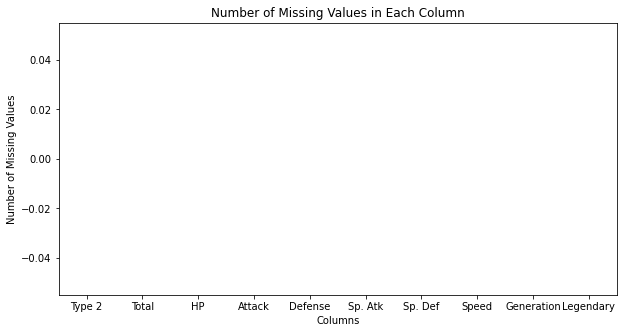

In [330]:
# check for missing values
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of missing values in each column
missing = df_class_weight.isnull().sum()

# Plot the number of missing values in each column
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values)

# Add labels and title to the plot
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values in Each Column")

# Show the plot
plt.show()

In [331]:
df

,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0.0,318,45,49,49,65,65,45,1,0
1,0.0,405,60,62,63,80,80,60,1,0
2,0.0,525,80,82,83,100,100,80,1,0
3,0.0,625,80,100,123,122,120,80,1,0
4,1.0,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
795,4.0,600,50,100,150,100,150,50,6,0
796,4.0,700,50,160,110,160,110,110,6,0
797,15.0,600,80,110,60,150,130,70,6,0
798,11.0,680,80,160,60,170,130,80,6,0


După cum putem observa metoda a funționat

__SMOTEENN__

One of the main drawbacks of SMOTE is that local outliers may influence it. Sometimes SMOTEcan take a minority sample that has only majority samples around, being in the middle of the majority class zone.

In [417]:
df = pd.read_csv('pokemon.csv')

df = df[['Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']]

In [418]:
# change the Legendary
def data_to_number(x):
    if x == "True":
        return 1
    else:
        return 0

df['Legendary'] = df["Legendary"].map(data_to_number)


# Get unique Type 2 values
unique_types = df['Type 2'].dropna().unique()

# Create a dictionary mapping each type to an integer
type_to_int = {type_: i for i, type_ in enumerate(unique_types)}

# Apply the mapping using map
df['Type 2'] = df['Type 2'].map(type_to_int)


In [419]:
df

,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0.0,318,45,49,49,65,65,45,1,0
1,0.0,405,60,62,63,80,80,60,1,0
2,0.0,525,80,82,83,100,100,80,1,0
3,0.0,625,80,100,123,122,120,80,1,0
4,NaN,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
795,4.0,600,50,100,150,100,150,50,6,0
796,4.0,700,50,160,110,160,110,110,6,0
797,15.0,600,80,110,60,150,130,70,6,0
798,11.0,680,80,160,60,170,130,80,6,0


In [385]:
!pip install crucio

  Using cached crucio-0.1.94-py3-none-any.whl (29 kB)


In [ ]:
# nu functioneaza cu Nan values

In [396]:
from crucio import SMOTEENN 

smoteenn = SMOTEENN() 

balanced_df = smoteenn.balance(df, 'Legendary')

NotBinaryData: Legendary column isn't a binary column

In [378]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import pandas as pd

# Fill NaN values with the most frequent class in the 'Type 2' column
imputer = SimpleImputer(strategy='most_frequent')
df['Type 2'] = imputer.fit_transform(df['Type 2'].values.reshape(-1, 1))

# Define the features (X) and target variable (y)
X = df.drop('Type 2', axis=1)
y = df['Type 2']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the minimum number of samples in any class
n_samples = df['Type 2'].value_counts().min() - 1

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create an instance of EditedNearestNeighbours
enn = EditedNearestNeighbours(k_neighbors <=n_samples)

# Create a SMOTEENN instance with enn parameter set to the previously created EditedNearestNeighbours object
smoteenn = SMOTEENN(random_state=42, enn=enn)

# Apply SMOTEENN to the training dataset
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the balanced training data
model.fit(X_train_resampled, y_train_resampled)

# Test the model on the testing data
score = model.score(X_test, y_test)
print("Accuracy:", score)


NameError: name 'k_neighbors' is not defined

__ICOTE__

(Immune centroids over-sampling method for multiclass classification) is an oversampling method out of the SMOTE family that generates new minority samples by trying to replicate the principles of Immune systems. ICOTE algorithm can be separated into two phases:

1. Clone generation


2. Mutains generation

In [412]:
from crucio import ICOTE 

icote = ICOTE() 

balanced_df = icote.balance(df, 'Legendary')

NotBinaryData: Legendary column isn't a binary column

In [411]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from crucio import ICOTE 

# Fill NaN values with the most frequent class in the 'Type 2' column
df['Type 2'] = df['Type 2'].fillna(df['Type 2'].mode()[0])

# Define the features (X) and target variable (y)
X = df.drop('Type 2', axis=1)
y = df['Type 2']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create an ICOTE instance
icote = ICOTE()

# Apply ICOTE to the training dataset
# X_train_resampled, y_train_resampled = icote.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = icote.resample(X_train, y_train)


# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the balanced training data
model.fit(X_train_resampled, y_train_resampled)

# Test the model on the testing data
score = model.score(X_test, y_test)
print("Accuracy:", score)


AttributeError: 'ICOTE' object has no attribute 'resample'

__TKRKNN__

(Top-K Reversed KNN) has a very different way of generating new samples compared to the SMOTE family or ICOTE. The difference is that it generates new samples non-linearly- meaning that the new sample isn’t somewhere on the line that links two samples.

In [424]:
from crucio import TKRKNN 

tkrknn = TKRKNN()

balanced_df = tkrknn.balance(df, 'Legendary')


NotBinaryData: Legendary column isn't a binary column

In [425]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from crucio import TKRKNN

# Fill NaN values with the most frequent class in the 'Type 2' column
df['Type 2'] = df['Type 2'].fillna(df['Type 2'].mode()[0])

# Define the features (X) and target variable (y)
X = df.drop('Legendary', axis=1)
y = df['Legendary']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create a TKRKNN instance
tkrknn = TKRKNN()

# Apply TKRKNN to the training dataset
X_train_resampled, y_train_resampled = tkrknn.balance(X_train, y_train)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the balanced training data
model.fit(X_train_resampled, y_train_resampled)

# Test the model on the testing data
score = model.score(X_test, y_test)
print("Accuracy:", score)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'